In [45]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rc('figure', figsize=(12, 8.0))

In [46]:
df=pd.read_csv('data/SPY-RSI-MACD-Daily.csv',index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df=df.drop(columns=['Ticker'])
print(df.info())
df.tail(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1717 entries, 2016-01-04 to 2022-10-26
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MACD            1717 non-null   float64
 1   TrendMACD       1717 non-null   float64
 2   RSI             1717 non-null   float64
 3   TrendRSI        1717 non-null   float64
 4   Trend_MACD_RSI  1717 non-null   float64
 5   Price           1717 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB
None


,MACD,TrendMACD,RSI,TrendRSI,Trend_MACD_RSI,Price
Date/Time,,,,,,
2022-10-20,-3.34,0.0,44.53,0.0,1.0,365.41
2022-10-21,-2.31,0.0,50.55,1.0,2.0,374.29
2022-10-24,-1.10,0.0,53.34,1.0,2.0,378.87
2022-10-25,0.34,1.0,56.80,1.0,3.0,384.92
2022-10-26,1.14,1.0,54.72,1.0,3.0,382.02


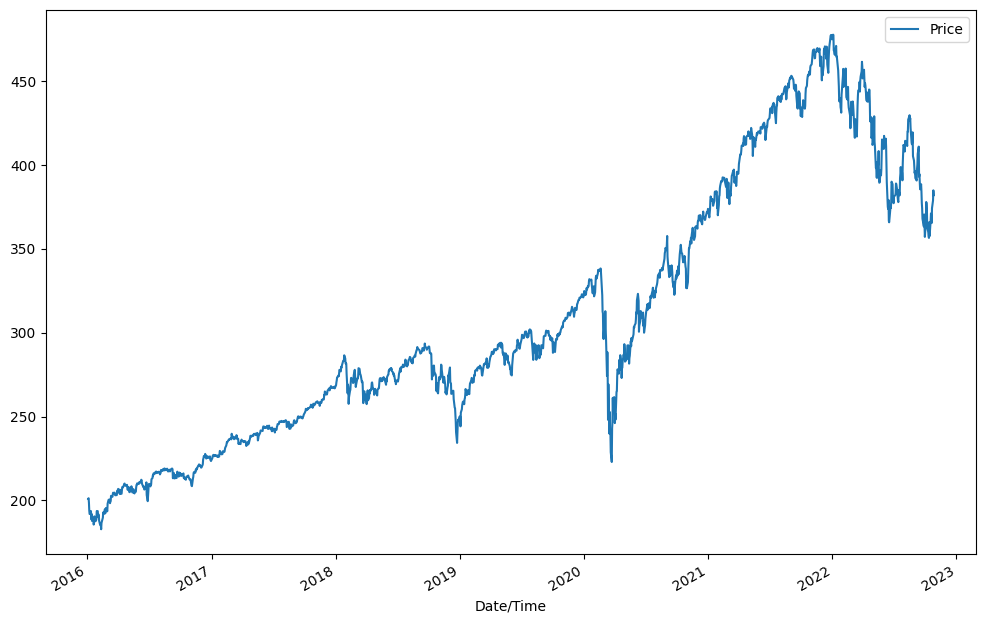

In [47]:
df.plot( y='Price');

# df.plot(x='Date/Time', y='MACD');

In [50]:
features = ['MACD','TrendMACD','RSI','TrendRSI','Trend_MACD_RSI']
target = 'Price'

train_period_to='2021-12-31'
test_period_from='2022-01-01'
test_period_to='2022-12-31'


X_train, X_test = df.loc[:train_period_to, features], df.loc[test_period_from:test_period_to, features]

y_train, y_test = df.loc[:train_period_to, target], df.loc[test_period_from:test_period_to, target] 



In [51]:

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)



In [52]:


# Train the model using the training set
regr.fit(X_train, y_train)



LinearRegression(fit_intercept=False)

In [53]:
y_pred = regr.predict(X_test)

In [54]:
print('Root Mean Squared Error: {0:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Explained variance score: 1 is perfect prediction
print('Variance Score: {0:.2f}'.format(r2_score(y_test, y_pred)))

Root Mean Squared Error: 148.30
Variance Score: -23.09


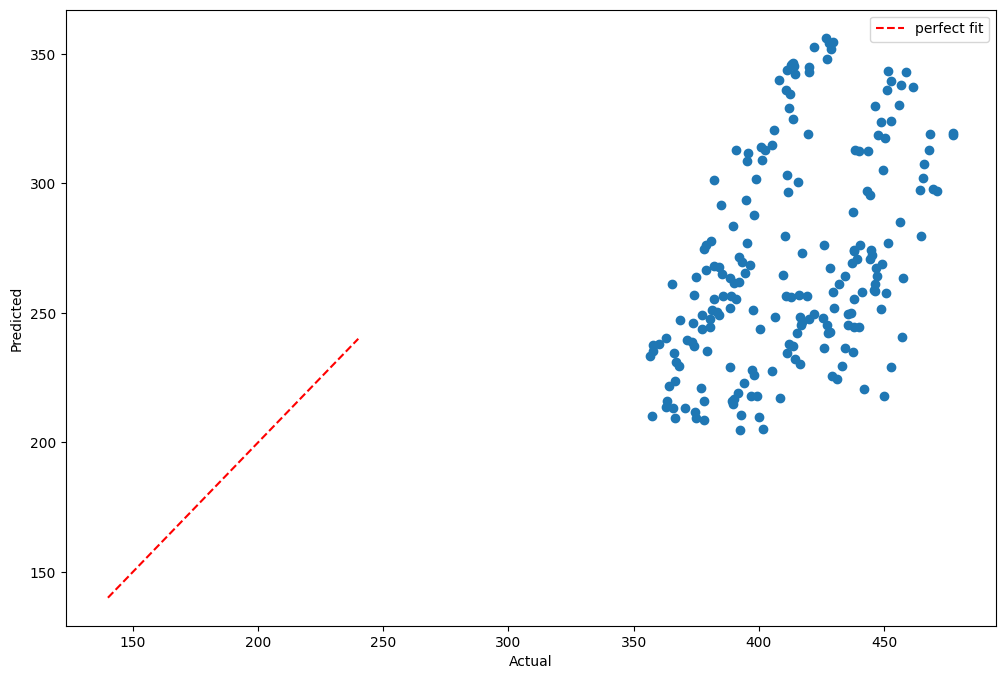

In [55]:


plt.scatter(y_test, y_pred)
plt.plot([140, 240], [140, 240], 'r--', label='perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();

